In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import utils
import time

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(f"x_train: {x_train.shape}, y_train: {y_train.shape} , x_test: {x_test.shape}, y_test: {y_test.shape}")

x_train: (60000, 28, 28), y_train: (60000,) , x_test: (10000, 28, 28), y_test: (10000,)


In [4]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784
classes = { 0:"T-shirt/top(футболка)", 
            1: "Trouser(штани)",
            2: "Pullover(світер)",
            3: "Dress(плаття)",
            4: "Coat(пальто)",
            5: "shoes(туфлі)",
            6: "shirt(сорочка)",
            7: "sneakers(кросівки)",
            8: "bag(сумка)",
            9: "Ankle boot(чоботи)"}

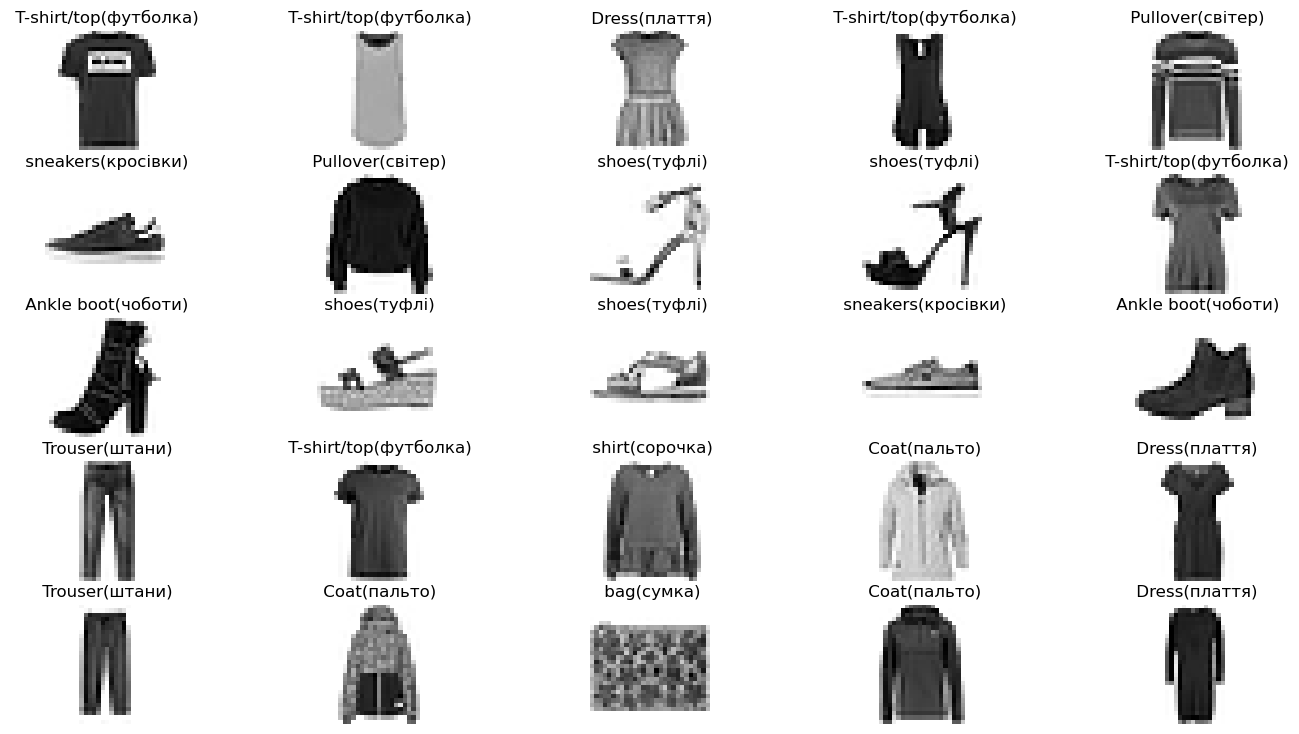

In [5]:

plt.figure(figsize=(17,9))
for i in range(1, 26):
  plt.subplot(5, 5, i-1 + 1)
  plt.imshow(x_train[i],  cmap=plt.cm.binary)
  plt.axis('off')
  plt.title(f" {classes[y_train[i]]}")


In [6]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Перетворюємо матриці розміром 28x28 пікселів у вектор 
x_train, x_valid, x_test = x_train.reshape(x_train.shape[0], 28, 28, 1 ), x_valid.reshape(x_valid.shape[0], 28,28,1), x_test.reshape(10000,28, 28, 1 )

# Нормалізуємо значення пікселів
x_train, x_test = x_train.astype("float32") / 255, x_test.astype("float32") / 255
y_train, y_valid, y_test = utils.to_categorical(y_train, num_classes), utils.to_categorical(y_valid, num_classes), utils.to_categorical(y_test, num_classes)

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape},        y_test: {y_test.shape}")
print(f"x_valid: {x_valid.shape},  y_valid: {y_valid.shape}")

x_train: (55000, 28, 28, 1), x_test: (10000, 28, 28, 1)
y_train: (55000, 10),        y_test: (10000, 10)
x_valid: (5000, 28, 28, 1),  y_valid: (5000, 10)


Тепер визначимо архітектуру. Згорткові нейронні мережі. Convolutional Neural Network (CNN)

In [7]:
from keras import layers
from keras import models

model = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),

    layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),

    layers.Conv2D(filters=32, kernel_size=2, activation="relu"),

    layers.Flatten(),

    layers.Dense(512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [9]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

Навчання моделі

In [10]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 116s 66ms/step - loss: 0.4736 - accuracy: 0.8248 - val_loss: 29.4337 - val_accuracy: 0.8720
Epoch 2/10
1719/1719 [==============================] - 112s 65ms/step - loss: 0.3143 - accuracy: 0.8849 - val_loss: 23.3000 - val_accuracy: 0.8748
Epoch 3/10
1719/1719 [==============================] - 110s 64ms/step - loss: 0.2748 - accuracy: 0.8982 - val_loss: 20.4251 - val_accuracy: 0.8926
Epoch 4/10
1719/1719 [==============================] - 108s 63ms/step - loss: 0.2535 - accuracy: 0.9046 - val_loss: 22.8450 - val_accuracy: 0.8830
Epoch 5/10
1719/1719 [==============================] - 110s 64ms/step - loss: 0.2355 - accuracy: 0.9114 - val_loss: 20.5595 - val_accuracy: 0.8978
Epoch 6/10
1719/1719 [==============================] - 110s 64ms/step - loss: 0.2207 - accuracy: 0.9174 - val_loss: 35.4824 - val_accuracy: 0.8718
Epoch 7/10
1719/1719 [==============================] - 112s 65ms/step - loss: 0.2098 - accuracy: 0.9207 - val_l

In [11]:
result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

1719/1719 [==============================] - 11s 6ms/step - loss: 0.1263 - accuracy: 0.9521
Відсоток точності тестових даних:  91.78
Відсоток точності навчальних даних:  95.21


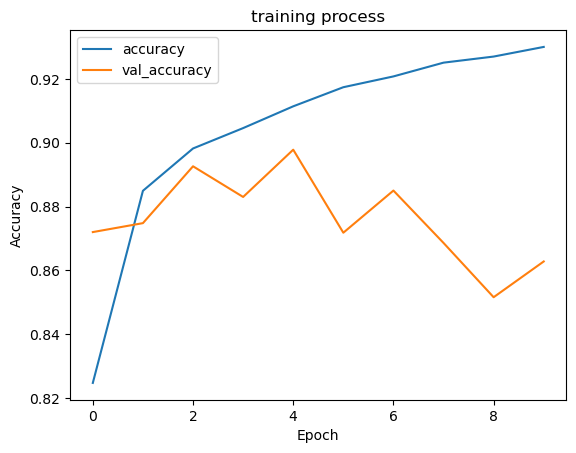

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('training process')
plt.legend()
plt.show()

висновок:  згорткові нейромережі на зображеннях навчаються більш точно ніж звичайні

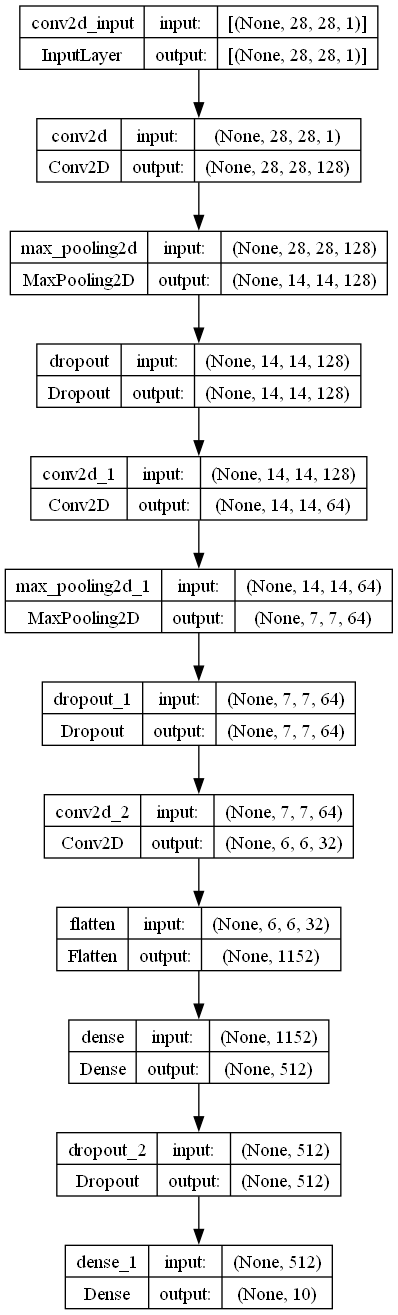

In [13]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)